In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

__LOADING THE DATA__

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
cp_df=df.copy()
df.shape
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

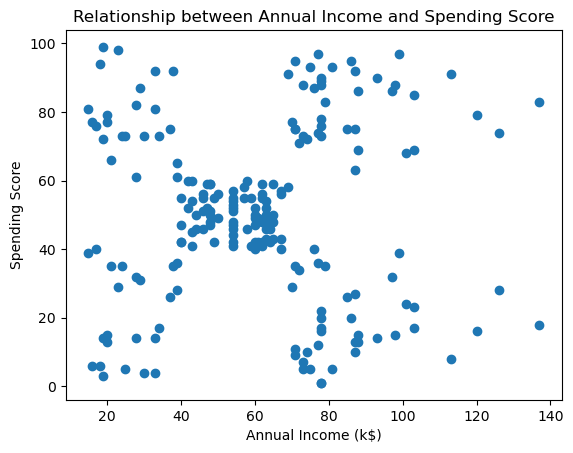

In [5]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [6]:
X=cp_df.iloc[:,[3,4]].values

__CALCULATING Within-Cluster Sum of Square__

In [7]:
#caluculating wcss
wcss=[]
for i in range(1,11):
       kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
       kmeans.fit(X)
       wcss.append(kmeans.inertia_)

__CALCULATING Elbow Moment__

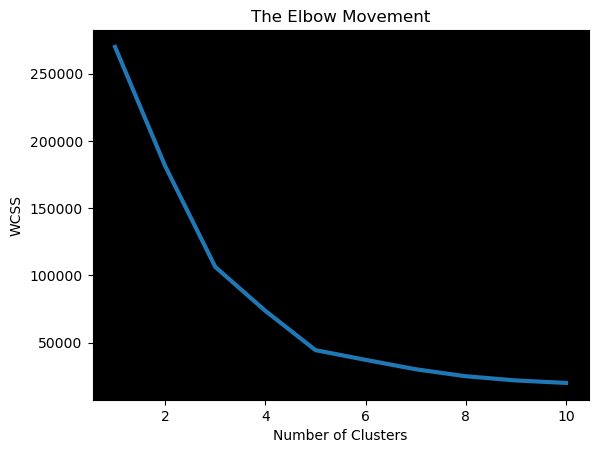

In [8]:
#elbow movement
plt.gca().set_facecolor('black')
plt.plot(range(1,11),wcss,linewidth=3)
plt.title('The Elbow Movement')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Silhouette score

In [9]:

silhouette_scores = []

for n_clusters in range(2, 11):  # Start from 2 clusters
    # Initialize and fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print("Number of clusters:", n_clusters, "| Silhouette score:", silhouette_avg)

Number of clusters: 2 | Silhouette score: 0.2968969162503008
Number of clusters: 3 | Silhouette score: 0.46761358158775435
Number of clusters: 4 | Silhouette score: 0.4931963109249047
Number of clusters: 5 | Silhouette score: 0.553931997444648
Number of clusters: 6 | Silhouette score: 0.53976103063432
Number of clusters: 7 | Silhouette score: 0.5288104473798049
Number of clusters: 8 | Silhouette score: 0.45481197931195283
Number of clusters: 9 | Silhouette score: 0.4561091950997367
Number of clusters: 10 | Silhouette score: 0.4410568674364981


__Plotting the Silhouette Scores__

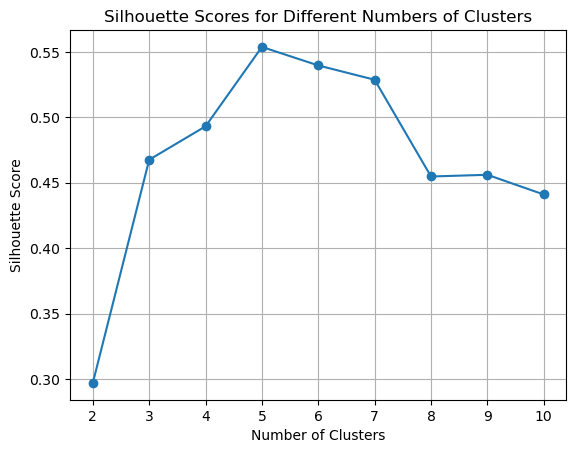

In [16]:


plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

By plotting this we can find out that the best value of k is 5

In [17]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)

In [18]:
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## Plotting the Clusters

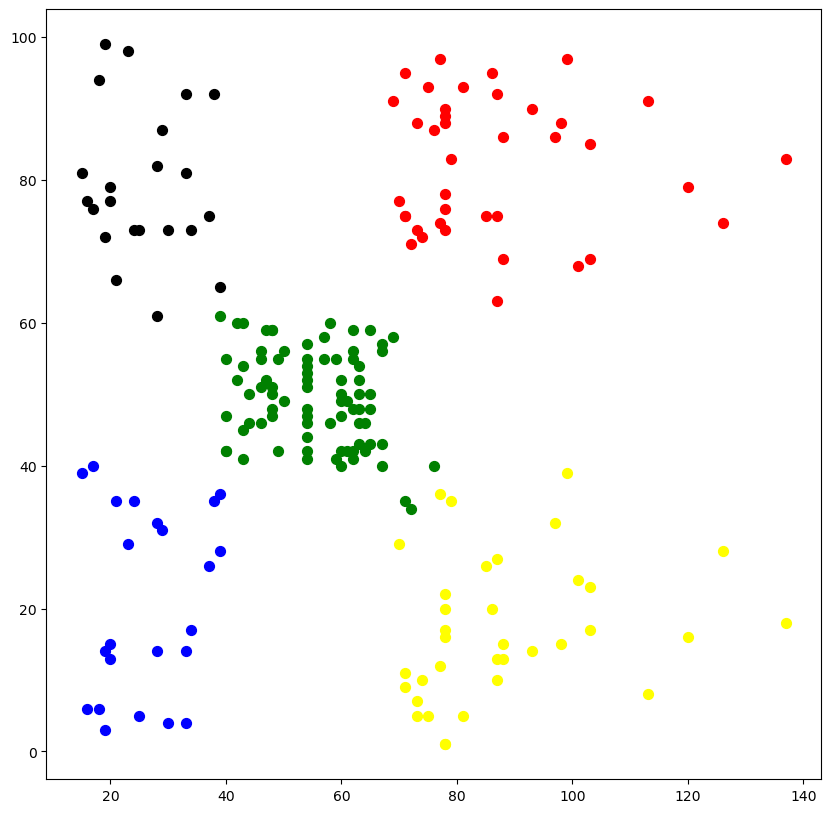

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='black',label='Cluster 5')

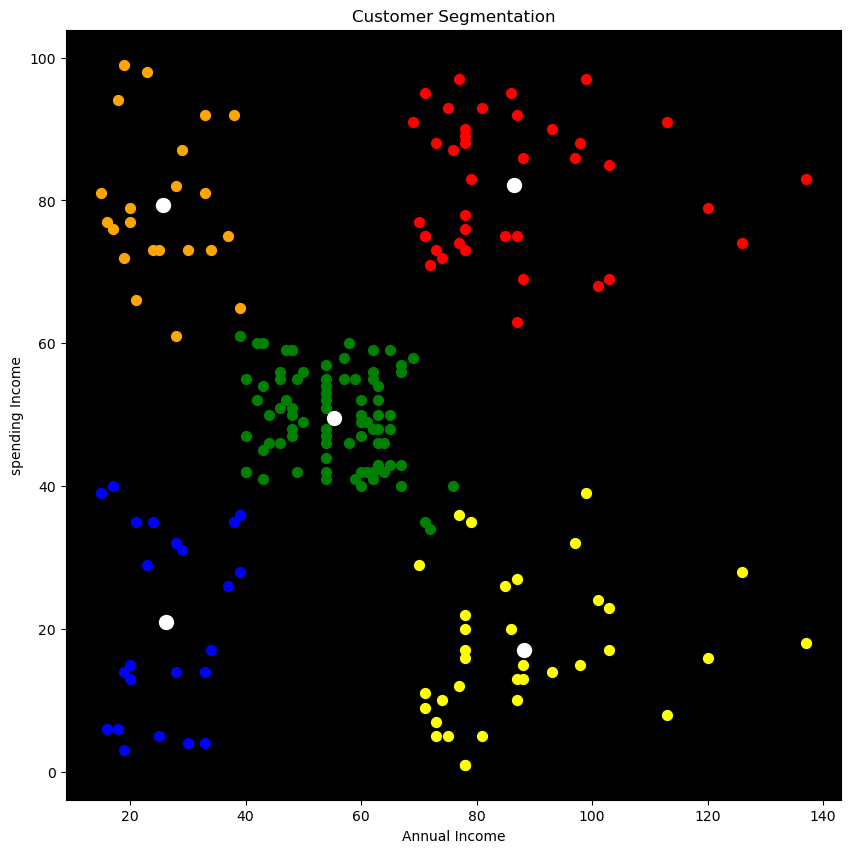

In [14]:
plt.figure(figsize=(10,10))
plt.gca().set_facecolor('black')
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='orange',label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='white',label="centroids")
plt.title("Customer Segmentation");
plt.xlabel("Annual Income");
plt.ylabel("spending Income");